In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#creating synthetic data
def get_data(N, use_noise):
    ts = np.sin(0.1 * np.arange(N)) + int(use_noise) * np.random.randn(N) * 0.1
    return ts

#plotting time series
def plot_ts(ts):
    plt.figure(figsize=[15,4])
    plt.plot(ts, color = 'black')
    plt.grid()
    plt.show()

def plot_ts_train_test(tstrain, tstest):
    plt.figure(figsize=[15,4])
    plt.plot(tstrain, label = 'train')
    plt.plot(range(len(tstrain), len(tstrain) + len(tstest)), tstest, label = 'test')
    plt.legend()
    plt.grid()
    plt.show()

def plot_two_ts_same_range(ts1, ts2):
    plt.figure(figsize=[15,4])
    plt.plot(ts1, label = 'ts1')
    plt.plot(ts2, label = 'ts2')
    def rmse(ytrue, ypred): return np.sqrt(((ytrue-ypred)**2).mean())
    plt.title('RMSE:' + str(rmse(ts1, ts2)))
    plt.grid()
    plt.show()

#creating the dataset
def dataset(ts, lag_window):
    T = lag_window
    X = []
    Y = []
    for t in range(len(ts) - T):
        x = ts[t: t+T]
        y = ts[t+T]
        X.append(x)
        Y.append(y)

    df = pd.DataFrame(np.c_[np.arange(T+1, len(ts)+1), X, Y], columns = ['date'] + ['lag_'+str(i) for i in list(range(T,0, -1))] + ['target'])
    df.date = df.date.astype(int)
    return df

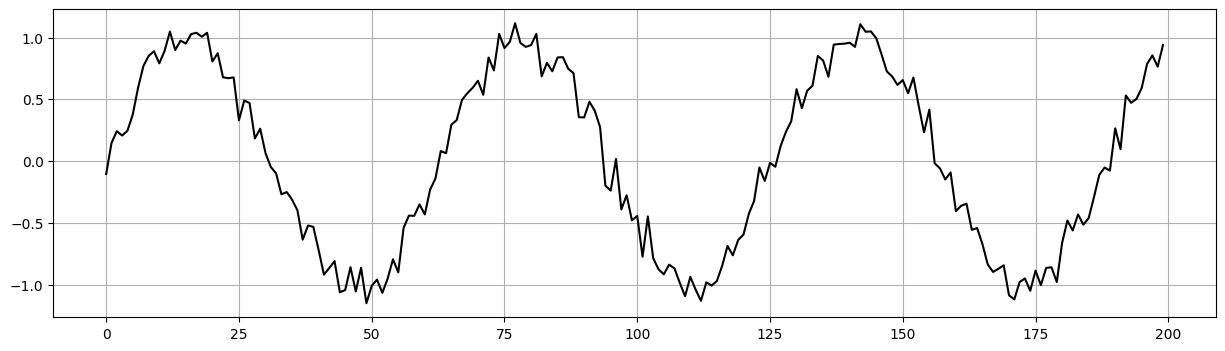

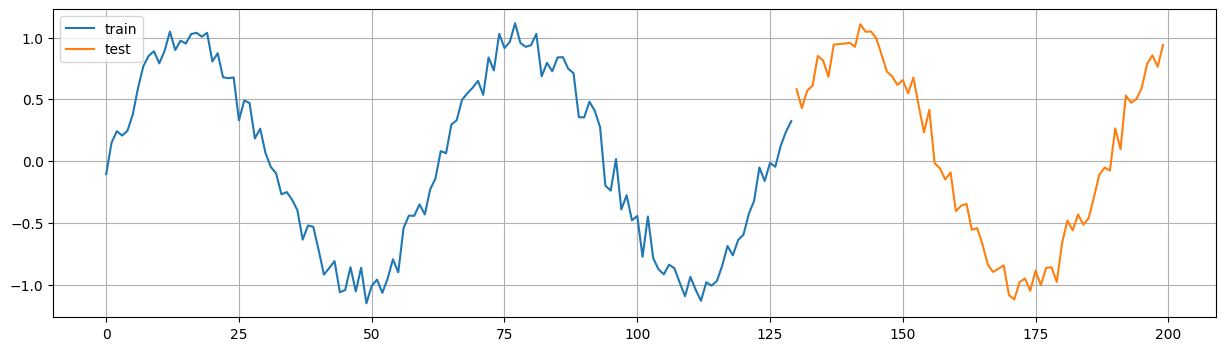

In [3]:
ts = get_data(N = 200, use_noise = True)

ts_train = ts[:130]
ts_test = ts[130:]

plot_ts(ts)
plot_ts_train_test(tstrain=ts_train, tstest=ts_test)


In [4]:
df_train = dataset(ts = ts_train, lag_window = 10)
N = df_train.shape[0]
X, Y = df_train.drop(['date','target'], axis = 1).values, df_train.target.values
print(X.shape, Y.shape)
df_train

(120, 10) (120,)


,date,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,target
0,11,-0.105700,0.145944,0.241465,0.206478,0.244673,0.375839,0.591801,0.768028,0.851268,0.888538,0.790716
1,12,0.145944,0.241465,0.206478,0.244673,0.375839,0.591801,0.768028,0.851268,0.888538,0.790716,0.891864
2,13,0.241465,0.206478,0.244673,0.375839,0.591801,0.768028,0.851268,0.888538,0.790716,0.891864,1.047679
3,14,0.206478,0.244673,0.375839,0.591801,0.768028,0.851268,0.888538,0.790716,0.891864,1.047679,0.898354
4,15,0.244673,0.375839,0.591801,0.768028,0.851268,0.888538,0.790716,0.891864,1.047679,0.898354,0.974317
...,...,...,...,...,...,...,...,...,...,...,...,...
115,126,-0.970574,-0.847359,-0.687686,-0.763568,-0.639482,-0.596132,-0.428674,-0.323508,-0.052254,-0.161880,-0.015174
116,127,-0.847359,-0.687686,-0.763568,-0.639482,-0.596132,-0.428674,-0.323508,-0.052254,-0.161880,-0.015174,-0.046671
117,128,-0.687686,-0.763568,-0.639482,-0.596132,-0.428674,-0.323508,-0.052254,-0.161880,-0.015174,-0.046671,0.121909
118,129,-0.763568,-0.639482,-0.596132,-0.428674,-0.323508,-0.052254,-0.161880,-0.015174,-0.046671,0.121909,0.236394


In [5]:
D = X.shape[1]
model = tf.keras.Sequential([    
    tf.keras.layers.Input(shape = (D, )),
    tf.keras.layers.Dense(1)])

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mse')
results = model.fit(X, Y, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 2.2604
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8046
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7519
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1509
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4075
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1056
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1311
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1147
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0882
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0478
Epoch 13/100
4/4 [==============================] - 0s 1ms/st

In [6]:
#wrong way of forecasting: use the ts_test, create a similar dataset with the training dataset (with lagging values from the test dataset) --> leakage!
#correct way of forecasting: use the predicted values from training data as inputs for predicting test datasets

#let's run both ways and compare the results

3/3 [==============================] - 0s 2ms/step


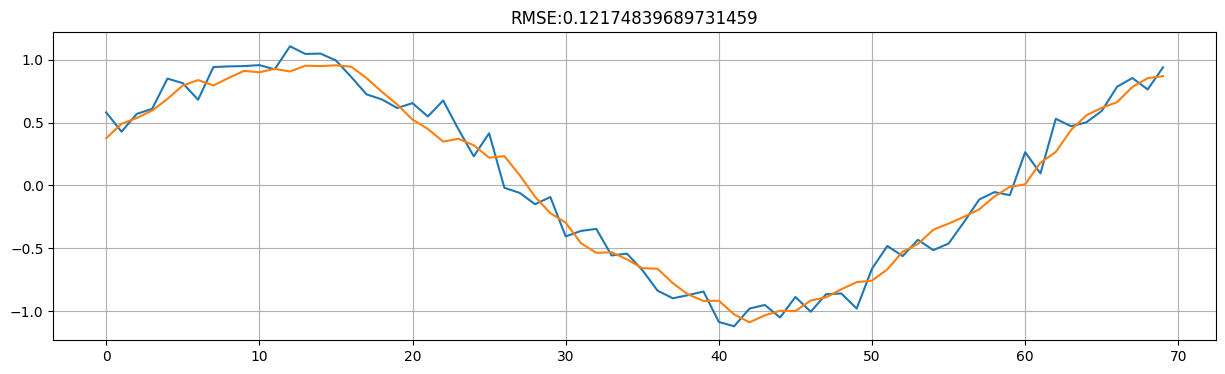

In [7]:
#WRONG WAY!!
T = 10 
df_test = dataset(np.concatenate([ts_train[-T:], ts_test]), lag_window = T)
Xtest, Ytest = df_test.drop(['date','target'], axis = 1).values, df_test.target.values
ypred_test = model.predict(Xtest).reshape(-1,)

plot_two_ts_same_range(ts1 = ts_test, ts2 = ypred_test)

1/1 [==============================] - 0s 17ms/step


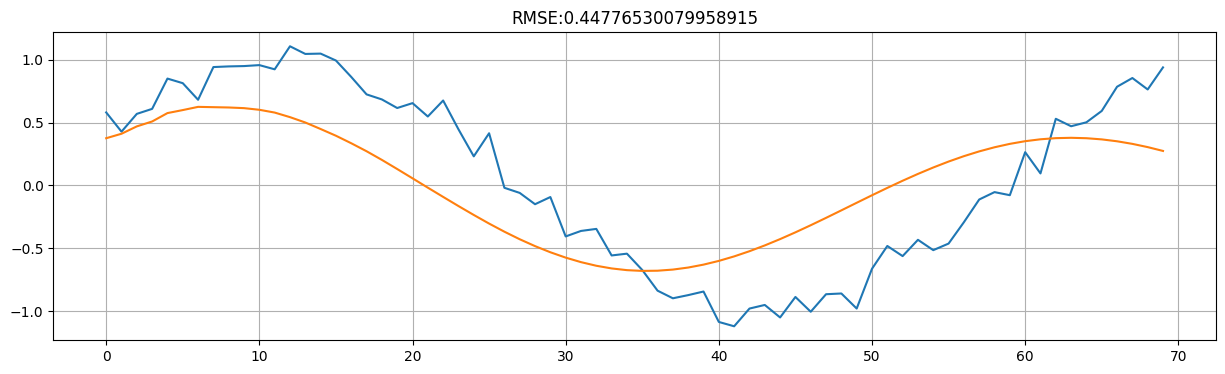

In [8]:
#CORRECT WAY!!
ypreds__ = []
last_T_values = ts_train[-T:]
for i in range(len(ts_test)):
    p = model.predict(last_T_values.reshape(1,T))[0][0]
    ypreds__.append(p)
    last_T_values = np.concatenate([last_T_values[1:].reshape(-1,), np.array(p).reshape(-1,)])

plot_two_ts_same_range(ts1 = ts_test, ts2 = np.array(ypreds__))

1/1 [==============================] - 0s 19ms/step


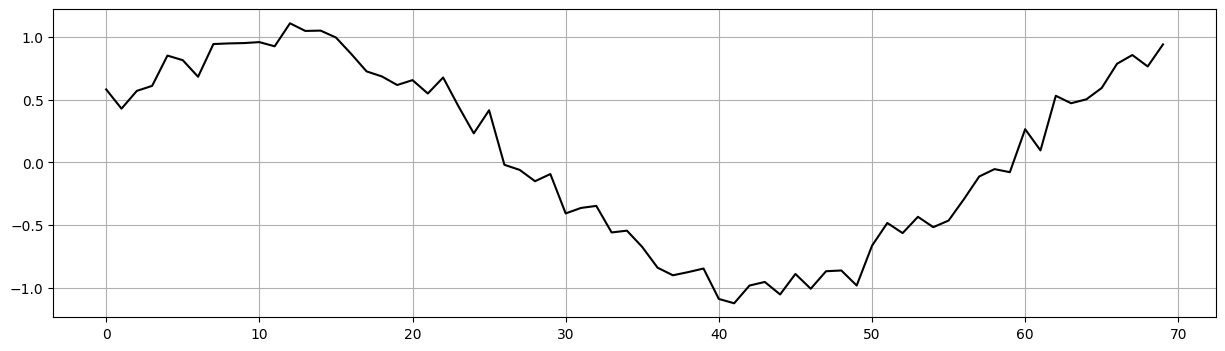

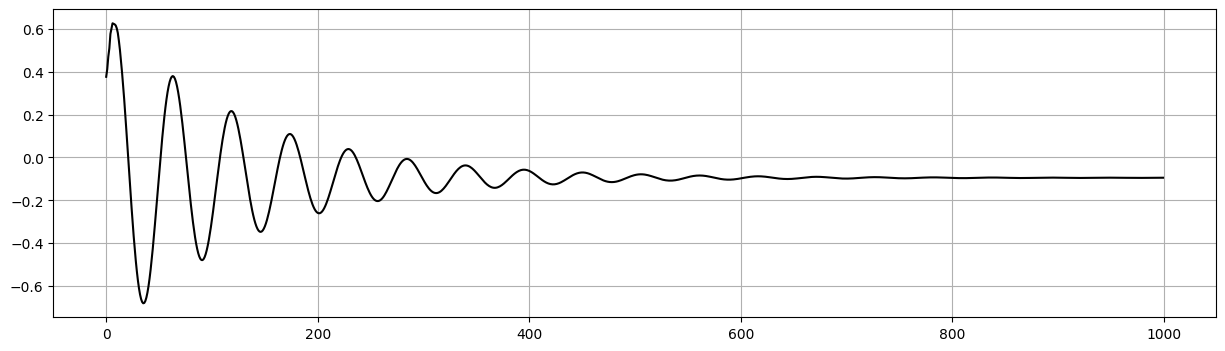

In [10]:
#CORRECT WAY --> long-term future
future__ = 1000
ypreds__ = []
last_T_values = ts_train[-T:]
for i in range(future__):
    p = model.predict(last_T_values.reshape(1,T))[0][0]
    ypreds__.append(p)
    last_T_values = np.concatenate([last_T_values[1:].reshape(-1,), np.array(p).reshape(-1,)])

plot_ts(ts_test)
plot_ts(np.array(ypreds__))